# Gradient Descent

### 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

In [349]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [350]:
#Generate the data
np.random.seed(42)
X = np.random.rand(1000, 2) #Create an array of the given shape (1000, 2) and populate it with random samples from a uniform distribution over [0, 1)
error = np.random.normal(loc=0, scale=1, size=1000) 
y = 3 * X[:,0] + 5 * X[:,1] + 3 + error
y = y.reshape(y.size,-1)

X = np.c_[np.ones(1000), X] #c_ concatenates 
X

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

### 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and simulate 500 epochs of batch gradient descent. Plot the resulting $\vec{\theta}$ values for every 5th epoch. (*)

In [44]:
def gradient_descent(X:np.array, y:np.array, iterations:int, learning_rate:float = .1) -> np.array:
    """
    Calculates batch gradient descent and returns theta.
    """

    m = len(X)

    theta = np.random.randn(X.shape[1], 1) # Random number from normal distribution with dimensions 3, 1. Theta is initialised to this value. 

    for _ in range(iterations):
        gradient = 2 / m * X.T @ (X @ theta - y) # Formula for calculating batch gradient descent
        theta -= learning_rate * gradient # Decrease / update theta with the learning rate * gradient

    return theta

In [45]:
theta = gradient_descent(X, y, 500)
theta.reshape(-1)

array([3.12412199, 2.95142955, 4.82898238])

In [46]:
def theta_values_for_diff_iterations(X:np.array, y:np.array, learning_rate:float, max_iterations:int, step:int) -> list:
    """
    Calculates theta for different number of iterations, 
    where the total number of iterations are max_iterations/step. 
    Returns all calculated theta values as a list.
    """

    theta_values_for_diff_iterations = []

    for iteration in range(1, max_iterations, step):
        theta_values = gradient_descent(X, y, iteration, learning_rate)
        theta_values = [theta_value for theta_value in theta_values.reshape(-1)]
        theta_values_for_diff_iterations.append(theta_values)
    
    return theta_values_for_diff_iterations

In [47]:
theta_values_500 = theta_values_for_diff_iterations(X=X, y=y, learning_rate=.1, max_iterations=500, step=5)

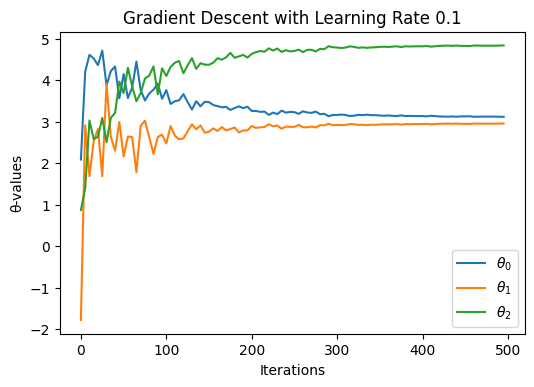

In [48]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(1, 500, 5), theta_values_500)
_ = ax.set(title="Gradient Descent with Learning Rate 0.1", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

b) Do the same as for a) but with learning rate  𝜂=0.01 , 5000 epochs and plot every 20 step. What do you notice when changing the learning rate? (*)

In [49]:
theta_values_5000 = theta_values_for_diff_iterations(X=X, y=y, learning_rate=.01, max_iterations=5000, step=20)

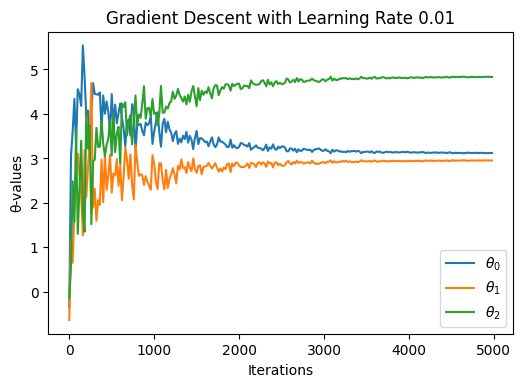

In [50]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(1, 5000, 20), theta_values_5000)
_ = ax.set(title="Gradient Descent with Learning Rate 0.01", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

### 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

In [744]:
def learning_rate_schedule(t):
    """
    Decrease learning rate as training progresses.
    """

    t0, t1 = 5, 50 #Learning schedule parameters. Scales the learning rate (we do not want it to take the same steps every time, it should take smaller steps at the end)
    return t0 / (t + t1) #The number will be smaller as t increases

In [745]:
def stochastic_gradient_descent(X, y, epochs):
    """
    Calculates stochastic gradient descent and returns theta.
    """

    theta = np.random.randn(X.shape[1], 1) #Initialises theta to a random number

    m = len(X)

    for epoch in range(epochs):
        for i in range(m): #For each iteration, picks out one observation and changes the gradient based on this
            random_index = np.random.randint(m) #Generate a random integer between 0 and the length of the data
            x_i = X[random_index:random_index+1] #We pick out one observation from x
            y_i = y[random_index:random_index+1] #We pick out one observation from y 
            gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i) #Calculates the gradients
            eta = learning_rate_schedule(epoch * m + i) #Updates the learning rate (decreasing it)
            theta -= eta * gradients #Update theta

    return theta

In [746]:
def theta_values_for_diff_iterations_stoch(X, y, max_epochs, step):
    """
    Calculates theta for different number of iterations, 
    where the total number of iterations are max_iterations/step. 
    Returns all calculated theta values as a list.
    """

    theta_values_for_diff_iterations = []

    for epoch in range(1, max_epochs, step):
        theta_values = stochastic_gradient_descent(X, y, epoch)
        theta_values = [theta_value for theta_value in theta_values.reshape(-1)]
        theta_values_for_diff_iterations.append(theta_values)
    
    return theta_values_for_diff_iterations

In [57]:
theta_stoch_grad_500 = stochastic_gradient_descent(X, y, epochs=500)
theta_stoch_grad_500

array([[3.1382612 ],
       [2.94688951],
       [4.8152784 ]])

In [727]:
theta_stoch_grad_5000 = stochastic_gradient_descent(X, y, epochs=5000)
theta_stoch_grad_5000

array([[3.11528947],
       [2.95819287],
       [4.83697502]])

In [747]:
theta_values_stoch_grad_500 = theta_values_for_diff_iterations_stoch(X=X, y=y, max_epochs=500, step=5)

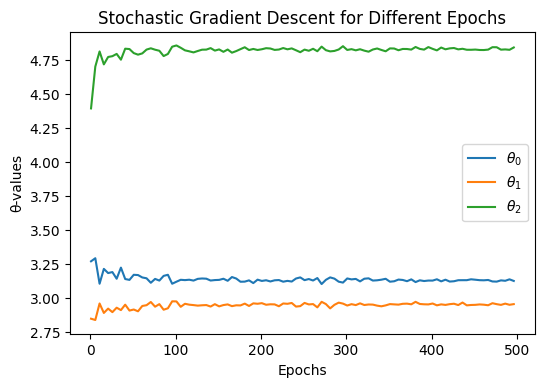

In [748]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(1, 500, 5), theta_values_stoch_grad_500)
_ = ax.set(title="Stochastic Gradient Descent for Different Epochs", xlabel="Epochs", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

In [ ]:
theta_stoch_grad_5000 = stochastic_gradient_descent(X, y, epochs=5000)
theta_stoch_grad_5000

array([[3.11745747],
       [2.95737048],
       [4.83706774]])

In [ ]:
theta_values_stoch_grad_500 = theta_values_for_diff_iterations_stoch(X=X, y=y, max_epochs=500, step=5)

### 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

In [728]:
def mini_batch_gradient_descent(X:np.array, y:np.array, batch_size:int, number_of_epochs:int = 500, learning_rate:float = .1, replace=True):
    """
    Calculates mini batch gradient descent and returns theta.
    """ 

    theta = np.random.randn(X.shape[1], 1) # Random number from normal distribution with dimensions 3, 1. Theta is initialised to this value. 
    
    for _ in range(number_of_epochs): 
        
        # Initialises to empty lists after each iteration
        mini_batches_X = [] 
        mini_batches_y = []
        gradient = 0
        
        for _ in range(int(len(X)/batch_size)): # Range is set to the number of batches that can be created, given the batch size and that all data is used

            # Creates the mini batches
            index = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=replace)
            mini_batch_X = X[index]
            mini_batch_y = y[index]
            mini_batches_X.append(mini_batch_X)
            mini_batches_y.append(mini_batch_y)
        
        for mini_batch_x, mini_batch_y in zip(mini_batches_X, mini_batches_y):
            gradient += 2 / len(mini_batch_x) * mini_batch_x.T @ (mini_batch_x @ theta - mini_batch_y) # Formula for calculating batch gradient descent (adds to the gradient)
        
        theta -= learning_rate * (gradient/batch_size) # Decrease / update theta with the learning rate * the mean gradient 

    return theta 

In [742]:
theta_mini_500 = mini_batch_gradient_descent(X, y, batch_size = 20, learning_rate=.1)
theta_mini_500

array([[3.10791323],
       [2.95913939],
       [4.83914613]])

In [731]:
theta_mini_5000 = mini_batch_gradient_descent(X, y, batch_size = 20, number_of_epochs = 5000, learning_rate=.01)
theta_mini_5000

array([[3.11635   ],
       [2.95972621],
       [4.83632241]])

In [734]:
def theta_values_for_diff_iterations_mini_batch(X:np.array, y:np.array, batch_size:int, max_epochs:int, step:int, learning_rate:float = .1, replace=True):
    """
    Calculates theta for different number of iterations, 
    where the total number of iterations are max_iterations/step. 
    Returns all calculated theta values as a list.
    """

    theta_values_for_diff_iterations = []

    for epoch in range(1, max_epochs, step):
        theta_values = mini_batch_gradient_descent(X, y, batch_size = batch_size, number_of_epochs = max_epochs, learning_rate = learning_rate, replace = replace)
        theta_values = [theta_value for theta_value in theta_values.reshape(-1)]
        theta_values_for_diff_iterations.append(theta_values)
    
    return theta_values_for_diff_iterations

In [736]:
theta_values_mini_batch_grad_500 = theta_values_for_diff_iterations_mini_batch(X=X, y=y, batch_size=20, max_epochs=500, step=5)

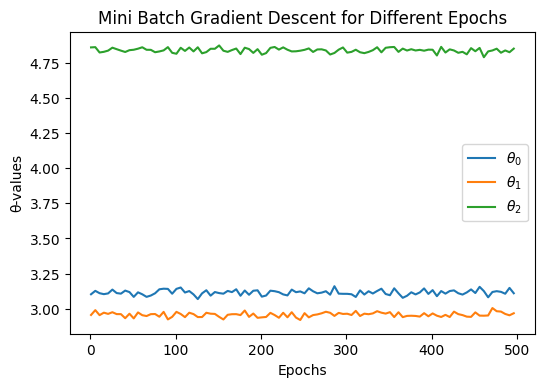

In [740]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot(range(1, 500, 5), theta_values_mini_batch_grad_500)
_ = ax.set(title="Mini Batch Gradient Descent for Different Epochs", xlabel="Epochs", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 